## Data set Titanic [^1]

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic
[^1]: https://www.kaggle.com/competitions/titanic/data

In [19]:
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

#test set του διαγωνισμου
test_set = "test.csv"
#το dataset που θα χρησιμοποιησουμε
train_set = "train.csv"
test_df = pd.read_csv(test_set)
train_df = pd.read_csv(train_set)
#test_df.info()
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

# Data Preproccessing


### A. Missing Values:

1. Numerical data: Age has some NaNs -> Cell 1
2. Categorical data: We need to count the NaNs value

In [21]:
NaNs_data_df =  train_df.isnull().sum().sort_values(ascending=False)
print(NaNs_data_df)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64
Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


In [22]:
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())
train_df["Cabin"] = train_df["Cabin"].fillna('U')
train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])

NaNs_data_df =  train_df.isnull().sum().sort_values(ascending=False)
print(NaNs_data_df)
train_df.head(20)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,U,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,U,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,U,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,U,C


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,U,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,U,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,U,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,U,C


## B. Data Transformation

### Gender

In [23]:
train_df['Sex'] = train_df['Sex'].map({'female':0,'male':1})
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500     U        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250     U        S  
3            113803  53.1000  C123        S  
4            373450   8.0500     U        S  
   PassengerId  Surv

### Embarked

In [24]:
print(train_df['Embarked'].describe())
train_df = pd.get_dummies(train_df,columns=["Embarked"])
print(train_df.head())

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500     U           0           0           1  
1          PC 17599  71.2833   C85           1           0      

### Cabin

* Could imply more features, by number of cabin.
* Could be represented with more meaningful way

In [25]:
print(train_df['Cabin'])

deck_set = train_df["Cabin"].str[0]
print(deck_set)

train_df['Cabin'] = deck_set
print(train_df['Cabin'].describe())

unique_list = list(train_df.Cabin.unique())
mapping = {item: unique_list.index(item) for item in unique_list}
train_df['Cabin'] = train_df['Cabin'].map(mapping)
print(train_df.head(10))

0         U
1       C85
2         U
3      C123
4         U
       ... 
886       U
887     B42
888       U
889    C148
890       U
Name: Cabin, Length: 891, dtype: object
0      U
1      C
2      U
3      C
4      U
      ..
886    U
887    B
888    U
889    C
890    U
Name: Cabin, Length: 891, dtype: object
count     891
unique      9
top         U
freq      687
Name: Cabin, dtype: object
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name  Sex        Age  SibSp  \
0                            Braund, Mr. Owen Harris    1  22.000000      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th..

### Ticket and Names
* Ticket contains 0 information
* Names contains title. By dropping it we lose information.

In [26]:
print(train_df['Ticket'].describe())

train_df = train_df.drop(['Ticket'],axis = 1)
train_df = train_df.drop(['Name'],axis = 1)
print(train_df.info())

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        891 non-null    int64  
 9   Embarked_C   891 non-null    uint8  
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 65.4 KB
None
count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

# Correlations
A good source of titanic dataset statistical analysis starting with the basics and concludes on analysing various correlations among the dataset at the following link [^1]

[^1]: https://makeschool.org/mediabook/oa/tutorials/titanic-dataset-tutorial-an-intro-to-data-analysis-and-statistics-n40/jupyter-notebooks/

### Graphical Correlations

C:\Users\nrk_pavilion\AppData\Local\Temp\ipykernel_10356\645336518.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[train_df['Survived']==1].Age.dropna(),label="Survived",bins=15,kde =False)
C:\Users\nrk_pavilion\AppData\Local\Temp\ipykernel_10356\645336518.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

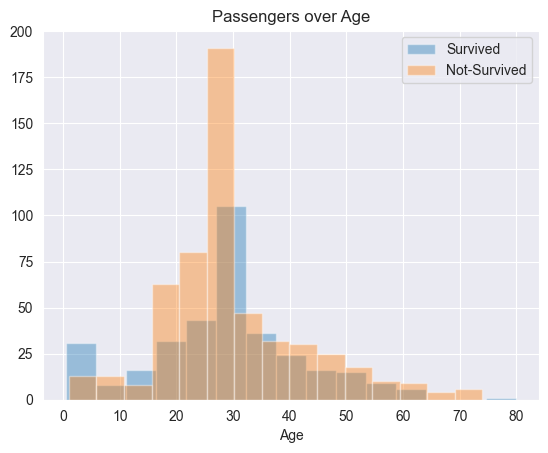

C:\Users\nrk_pavilion\AppData\Local\Temp\ipykernel_10356\645336518.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[train_df['Survived']==1].Age.dropna(),label="Survived",bins=15,kde =False)
C:\Users\nrk_pavilion\AppData\Local\Temp\ipykernel_10356\645336518.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

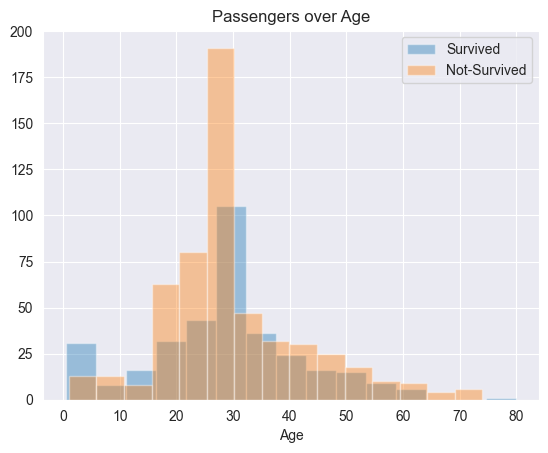

In [27]:
plt.figure('Passengers over Age')
sns.distplot(train_df[train_df['Survived']==1].Age.dropna(),label="Survived",bins=15,kde =False)
sns.distplot(train_df[train_df['Survived']==0].Age.dropna(),label="Not-Survived",bins=15,kde = False)
plt.legend()
plt.title(label='Passengers over Age')
plt.show()

C:\Users\nrk_pavilion\AppData\Local\Temp\ipykernel_10356\1677321157.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(females[females['Survived']==1].Age.dropna(),label="Survived",bins=15,kde =False)
C:\Users\nrk_pavilion\AppData\Local\Temp\ipykernel_10356\1677321157.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

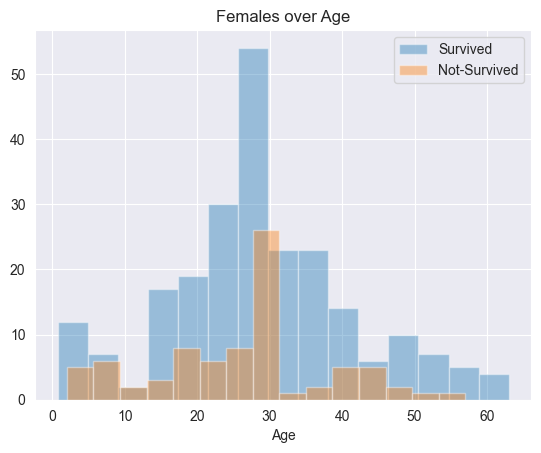

C:\Users\nrk_pavilion\AppData\Local\Temp\ipykernel_10356\1677321157.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(females[females['Survived']==1].Age.dropna(),label="Survived",bins=15,kde =False)
C:\Users\nrk_pavilion\AppData\Local\Temp\ipykernel_10356\1677321157.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

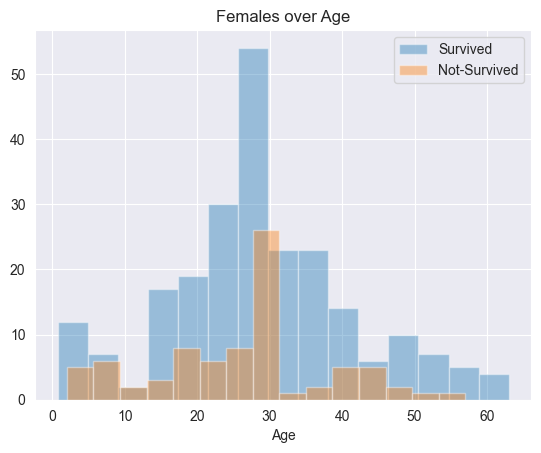

In [28]:
females = train_df[train_df['Sex']==0]
plt.figure('Females over Age')
sns.distplot(females[females['Survived']==1].Age.dropna(),label="Survived",bins=15,kde =False)
sns.distplot(females[females['Survived']==0].Age.dropna(),label="Not-Survived",bins=15,kde = False)
plt.legend()
plt.title(label='Females over Age')
plt.show()



C:\Users\nrk_pavilion\AppData\Local\Temp\ipykernel_10356\2712734945.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males[males['Survived']==1].Age.dropna(),label="Survived",bins=15,kde =False)
C:\Users\nrk_pavilion\AppData\Local\Temp\ipykernel_10356\2712734945.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

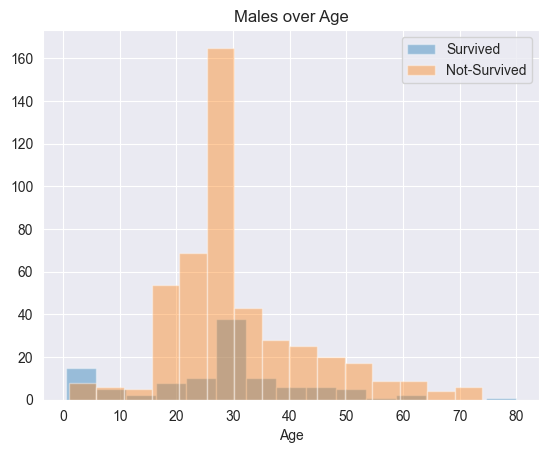

C:\Users\nrk_pavilion\AppData\Local\Temp\ipykernel_10356\2712734945.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males[males['Survived']==1].Age.dropna(),label="Survived",bins=15,kde =False)
C:\Users\nrk_pavilion\AppData\Local\Temp\ipykernel_10356\2712734945.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

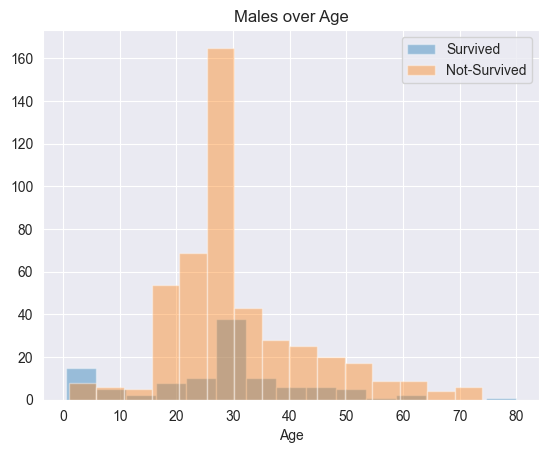

In [29]:
plt.figure('Males over Age')
males = train_df[train_df['Sex']==1]
sns.distplot(males[males['Survived']==1].Age.dropna(),label="Survived",bins=15,kde =False)
sns.distplot(males[males['Survived']==0].Age.dropna(),label="Not-Survived",bins=15,kde = False)
plt.title(label='Males over Age')
plt.legend()
plt.show()

### Correlation Heatmap

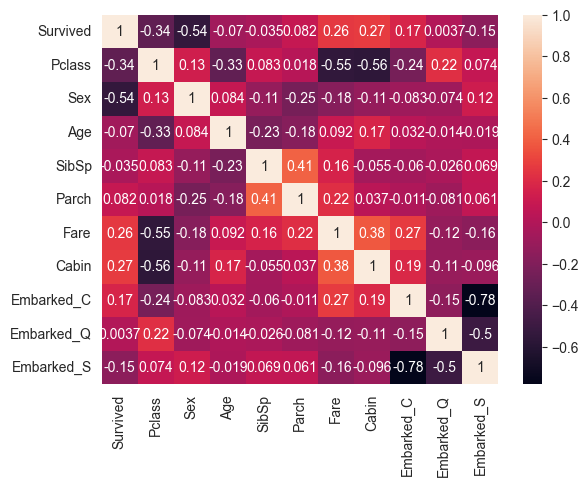

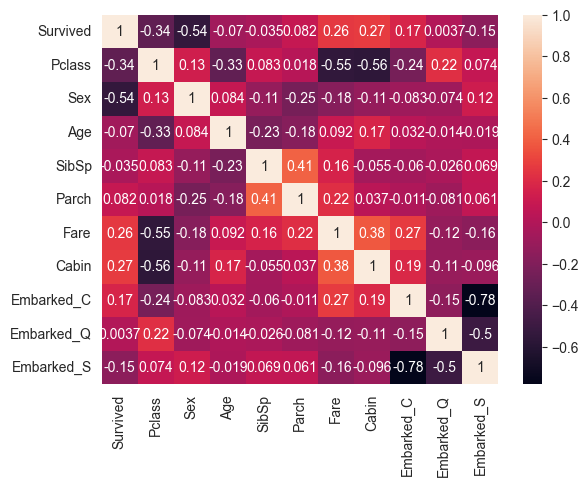

In [30]:
corr_df = train_df.drop(['PassengerId'], axis = 1)
sns.heatmap(corr_df.corr(),annot=True)
plt.show()

# Machine Learning Models

In [31]:
#Machine learning algorithms imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [32]:

def select_classifier(option):
    if option == 1:
        classifier = KNeighborsClassifier(p=1, n_neighbors=3)
    elif option == 2:
        classifier = SVC(kernel="linear", C=0.001, random_state=42)
    elif option == 3:
        classifier = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
    elif option == 4:
        classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
    elif option == 5:
        classifier = MLPClassifier(max_iter=10000, activation='logistic', random_state=42)
    elif option == 6:
        classifier = AdaBoostClassifier(n_estimators=200, random_state=42)
    elif option == 7:
        classifier = GaussianNB()
    else:
        raise ValueError("option values are : 1,2,3,4,5,6,7,8")
    return classifier

def run_classification(X,Y,classifier = 1):
    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=42)
#training
    model = select_classifier(classifier)
    model.fit(X_train,y_train)#to model arxika ekpaideyetai
    predictions = model.predict(X_test)#h provlepsi ginetai sto test
    print("---------------------------------------------------------------------")
    print(f"Classifier {option} yeilds training accuracy of {model.score(X_train,y_train)}\n with a testing accuracy of {accuracy_score(y_test, predictions)}")
    return classifier,model.score(X_train,y_train),accuracy_score(y_test, predictions)

In [33]:
X = corr_df.drop(['Survived'],axis = 1)
Y = corr_df['Survived']

In [34]:
models = ["k-NN", "SVM", "Dec Tree","R Forest", "N_Net",
          "AdaBoost", "Naive Bayes"]
models_train_acc = []
models_test_acc = []
for model in models:
    option = models.index(model)+1
    classifier, train_acc, test_acc = run_classification(X,Y,option)
    models_train_acc.append(train_acc)
    models_test_acc.append(test_acc)


---------------------------------------------------------------------
Classifier 1 yeilds training accuracy of 0.841091492776886
 with a testing accuracy of 0.7276119402985075
---------------------------------------------------------------------
Classifier 2 yeilds training accuracy of 0.6886035313001605
 with a testing accuracy of 0.6902985074626866
---------------------------------------------------------------------
Classifier 3 yeilds training accuracy of 0.8314606741573034
 with a testing accuracy of 0.8097014925373134
---------------------------------------------------------------------
Classifier 4 yeilds training accuracy of 0.9823434991974318
 with a testing accuracy of 0.7910447761194029
---------------------------------------------------------------------
Classifier 5 yeilds training accuracy of 0.8250401284109149
 with a testing accuracy of 0.8059701492537313
---------------------------------------------------------------------
Classifier 6 yeilds training accuracy of 0.878

### Visualization

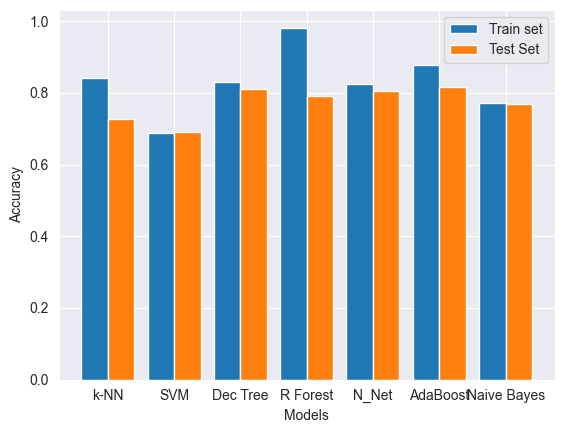

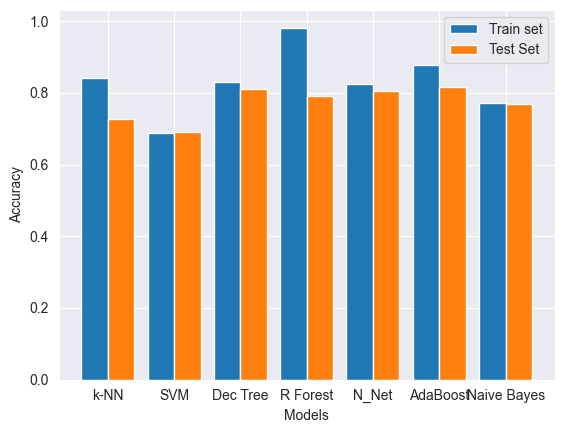

In [35]:
import numpy as np

fig = plt.figure("Classification Results")
x_axis = np.arange(len(models))
plt.bar(x_axis-0.2,models_train_acc,0.4,label = "Train set")
plt.bar(x_axis+0.2,models_test_acc,0.4,label = 'Test Set')
plt.xticks(x_axis,models)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Fine-Tune Classification Parameters

In [36]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

estimators = [i for i in range(10,210,10)]
depth = [i for i in range(1,24,4)]
params = {"n_estimators":estimators,
          "max_depth":depth}
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=42)
random_forest = RandomForestClassifier(criterion='entropy', random_state=42)
random_forest = GridSearchCV(random_forest,params,scoring='accuracy',n_jobs=4)
random_forest.fit(X_train,y_train)

print(f"Best Parameters: {random_forest.best_params_}")
print(f"Best mean cv accuracy: {random_forest.best_score_}")

y = random_forest.best_estimator_.predict(X_test)
print(f'Accuracy after GridSearch: {accuracy_score(y_test, y)}')

Best Parameters: {'max_depth': 5, 'n_estimators': 180}
Best mean cv accuracy: 0.8346580645161291
Accuracy after GridSearch: 0.8134328358208955
CPU times: total: 422 ms
Wall time: 32.2 s
Best Parameters: {'max_depth': 5, 'n_estimators': 180}
Best mean cv accuracy: 0.8346580645161291
Accuracy after GridSearch: 0.8134328358208955
CPU times: total: 359 ms
Wall time: 30 s


# Improve Accuracy ????
   1. More Transformations
      1. Age to Age Classes
      2. Title extraction from names
      3. Alone or not
   2. Feature Importance -> some features are deteriorating our efforts --> overfiting
   3. More parameter tunning
   4. Ensemble learning